<a href="https://colab.research.google.com/github/aniket15031998/8-week-SQL-challenge/blob/main/8_Weeks_SQL_Challenege_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY #4 DATA BANK**

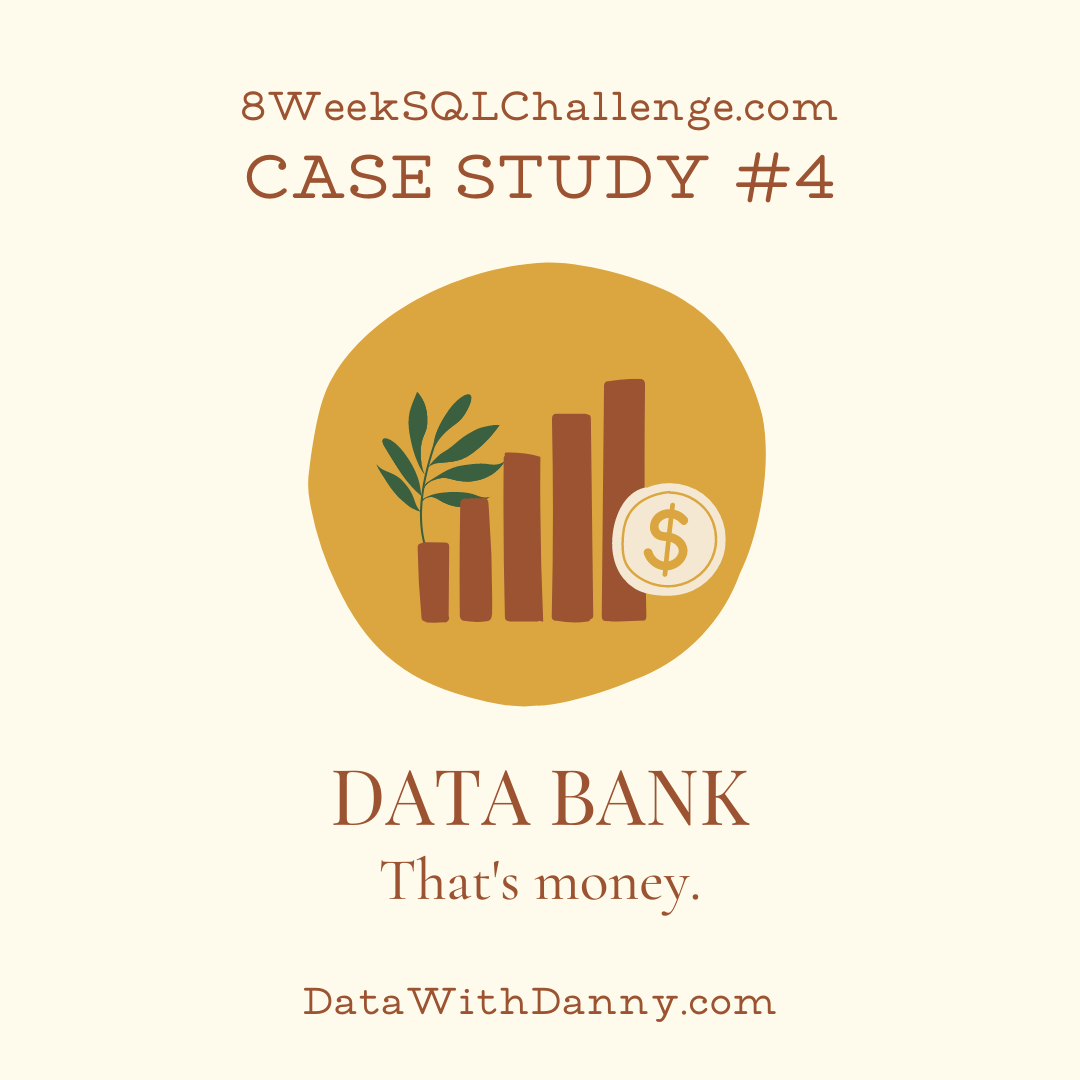


**Introduction**

There is a new innovation in the financial industry called Neo-Banks: new aged digital only banks without physical branches.

Danny thought that there should be some sort of intersection between these new age banks, cryptocurrency and the data world…so he decides to launch a new initiative - Data Bank!

Data Bank runs just like any other digital bank - but it isn’t only for banking activities, they also have the world’s most secure distributed data storage platform!

Customers are allocated cloud data storage limits which are directly linked to how much money they have in their accounts. There are a few interesting caveats that go with this business model, and this is where the Data Bank team need your help!

The management team at Data Bank want to increase their total customer base - but also need some help tracking just how much data storage their customers will need.

This case study is all about calculating metrics, growth and helping the business analyse their data in a smart way to better forecast and plan for their future developments!

**Available Data**

The Data Bank team have prepared a data model for this case study as well as a few example rows from the complete dataset below to get you familiar with their tables.

**Entity Relationship Diagram**

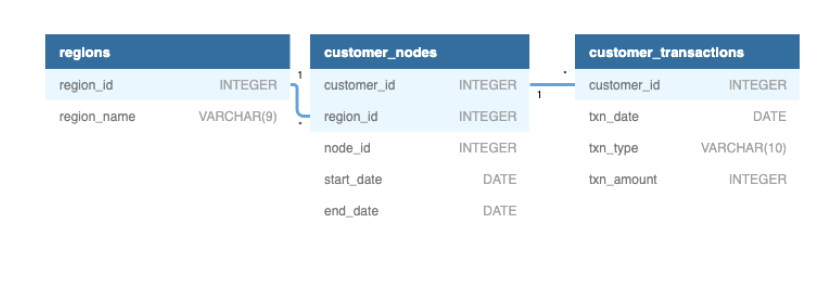

**Table 1: Regions**

Just like popular cryptocurrency platforms - Data Bank is also run off a network of nodes where both money and data is stored across the globe. In a traditional banking sense - you can think of these nodes as bank branches or stores that exist around the world.

This regions table contains the region_id and their respective region_name values

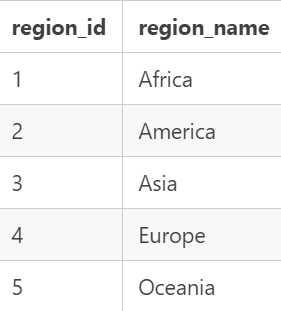

**Table 2: Customer Nodes**

Customers are randomly distributed across the nodes according to their region - this also specifies exactly which node contains both their cash and data.

This random distribution changes frequently to reduce the risk of hackers getting into Data Bank’s system and stealing customer’s money and data!

Below is a sample of the top 10 rows of the data_bank.customer_nodes

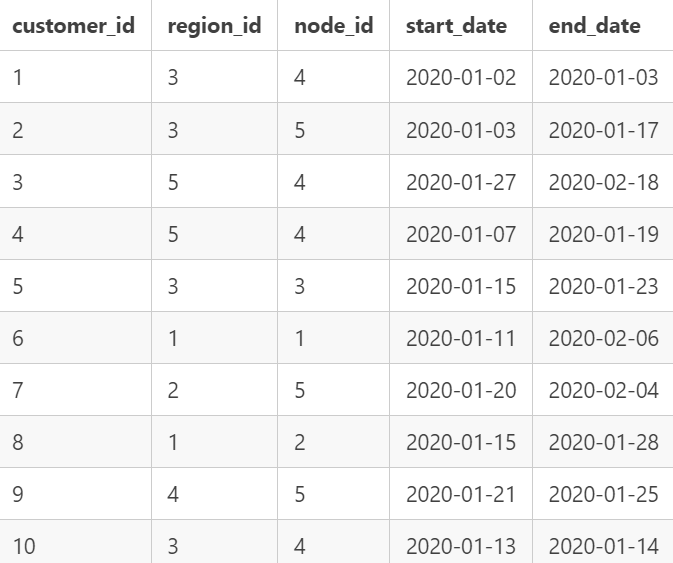

**Table 3: Customer Transactions**

This table stores all customer deposits, withdrawals and purchases made using their Data Bank debit card.

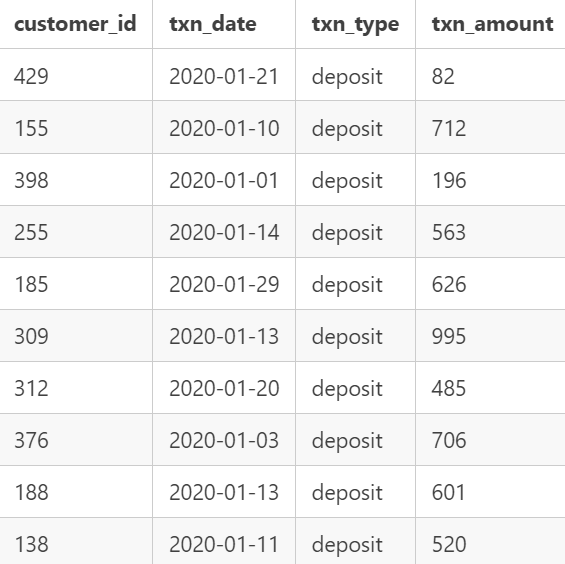

# **DATA**

```sql
CREATE TABLE regions (
  region_id INTEGER,
  region_name VARCHAR(9)
);

INSERT INTO regions
  (region_id, region_name)
VALUES
  ('1', 'Australia'),
  ('2', 'America'),
  ('3', 'Africa'),
  ('4', 'Asia'),
  ('5', 'Europe');


CREATE TABLE customer_nodes (
  customer_id INTEGER,
  region_id INTEGER,
  node_id INTEGER,
  start_date DATE,
  end_date DATE
);

INSERT INTO customer_nodes
  (customer_id, region_id, node_id, start_date, end_date)
VALUES
  ('1', '3', '4', '2020-01-02', '2020-01-03'),
  ('2', '3', '5', '2020-01-03', '2020-01-17'),
  ('3', '5', '4', '2020-01-27', '2020-02-18'),
  ('4', '5', '4', '2020-01-07', '2020-01-19'),
  ('5', '3', '3', '2020-01-15', '2020-01-23'),
  ('6', '1', '1', '2020-01-11', '2020-02-06'),
  ('7', '2', '5', '2020-01-20', '2020-02-04'),
  ('8', '1', '2', '2020-01-15', '2020-01-28'),
  ('9', '4', '5', '2020-01-21', '2020-01-25'),
  ('10', '3', '4', '2020-01-13', '2020-01-14'),
  continue..
  
  CREATE TABLE customer_transactions (
  customer_id INTEGER,
  txn_date DATE,
  txn_type VARCHAR(10),
  txn_amount INTEGER
);

INSERT INTO customer_transactions
  (customer_id, txn_date, txn_type, txn_amount)
VALUES
  ('429', '2020-01-21', 'deposit', '82'),
  ('155', '2020-01-10', 'deposit', '712'),
  ('398', '2020-01-01', 'deposit', '196'),
  ('255', '2020-01-14', 'deposit', '563'),
  ('185', '2020-01-29', 'deposit', '626'),
  ('309', '2020-01-13', 'deposit', '995'),
  ('312', '2020-01-20', 'deposit', '485'),
  ('376', '2020-01-03', 'deposit', '706'),
  ('188', '2020-01-13', 'deposit', '601'),
   continue..
  ```

# Before moving further we will first check number of tables and their names

 syntax for same in mysql is

```sql
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'data_bank';
```

Output:

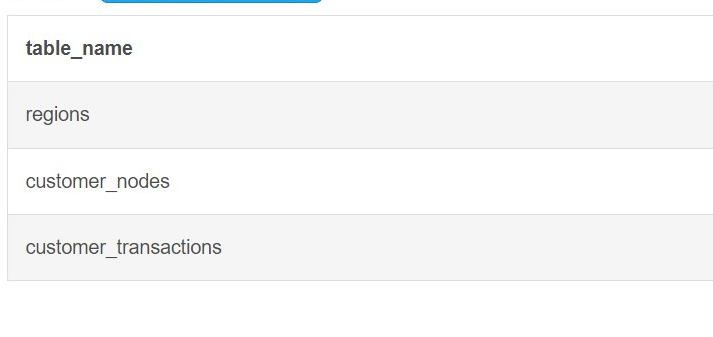

# We will proceed the given case study questions as per the sections

# A. Customer Nodes Exploration

## 1. How many unique nodes are there on the Data Bank system?

```sql
SELECT count(distinct(node_id)) as unique_node_id
FROM data_bank.customer_nodes;
```

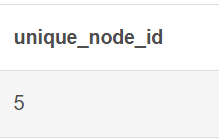

## 2. What is the number of nodes per region?



```sql
SELECT c.region_id,r.region_name,
count(c.node_id) as number_of_nodes,
count(distinct(c.node_id)) as unique_nodes
FROM data_bank.customer_nodes as c
left join data_bank.regions as r
on c.region_id=r.region_id
group by c.region_id,r.region_name
order by c.region_id asc;
```

Output:

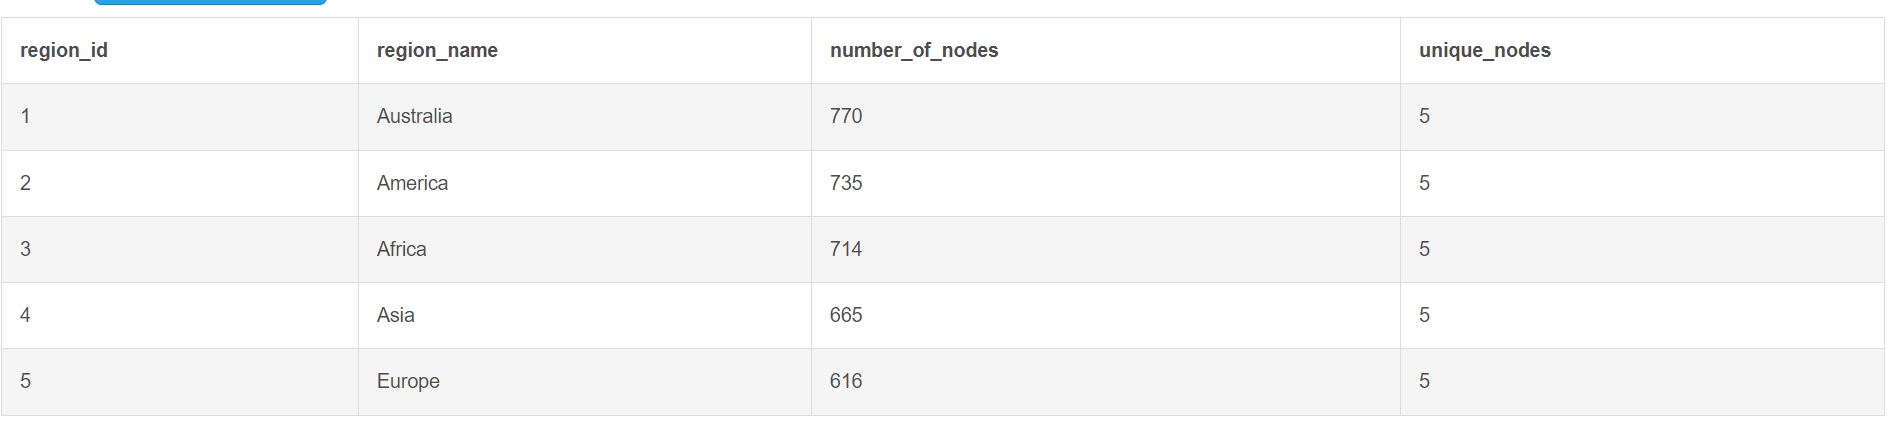

## 3. How many customers are allocated to each region?


```sql
select c.region_id,r.region_name,
count(distinct(c.customer_id)) as no_of_customers
from data_bank.customer_nodes as c
left join data_bank.regions as r
on c.region_id=r.region_id
group by c.region_id,r.region_name
order by c.region_id
```
Output:

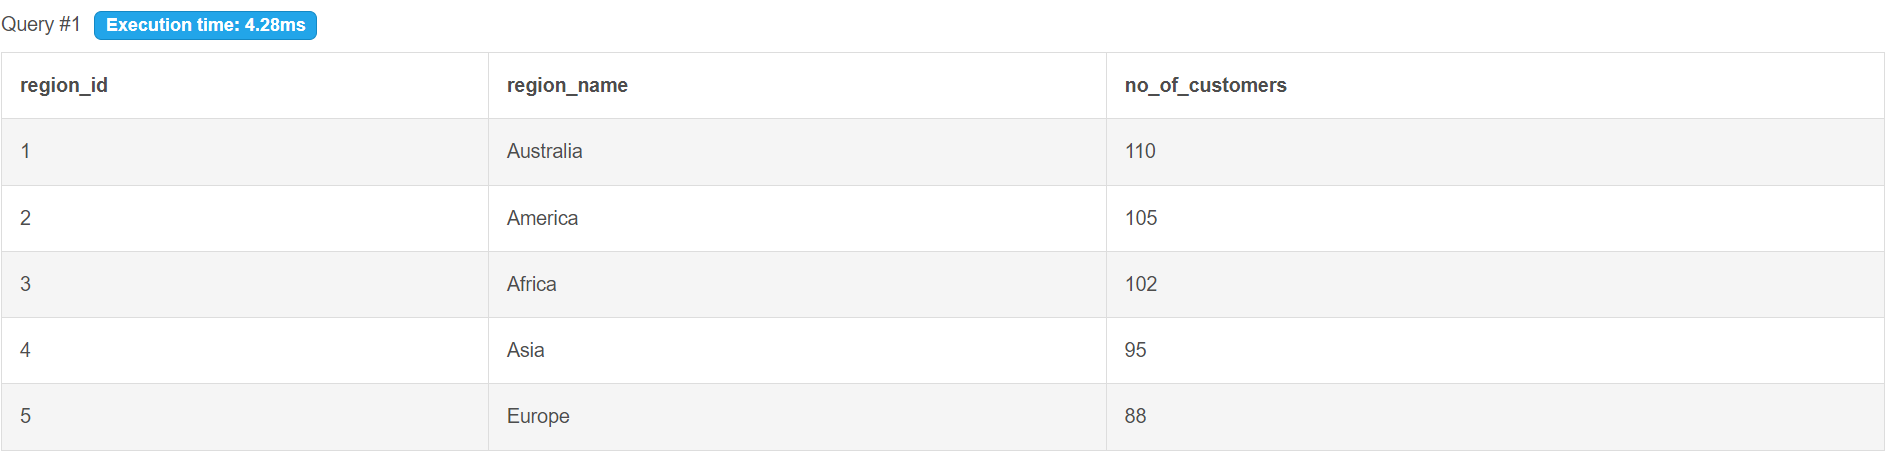


## 4.How many days on average are customers reallocated to a different node?

```sql
WITH DAYS_IN_NODE AS (
SELECT
customer_id,
node_id,
SUM(DATEDIFF(end_date,start_date)) as days_in_node
FROM customer_nodes
WHERE end_date <> '9999-12-31'
GROUP BY customer_id,
node_id
)

SELECT
ROUND(AVG(days_in_node)) as average_days_in_node
FROM DAYS_IN_NODE
```

Output:

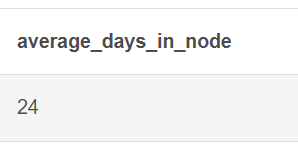


## 5.What is the median, 80th and 95th percentile for this same reallocation days metric for each region?

# B. Customer Transactions

## 1. What is the unique count and total amount for each transaction type?

```sql
SELECT txn_type,count(txn_type) as txn_count,
sum(txn_amount) as total_amount
FROM data_bank.customer_transactions
GROUP BY txn_type
ORDER BY txn_type;
```

Output:

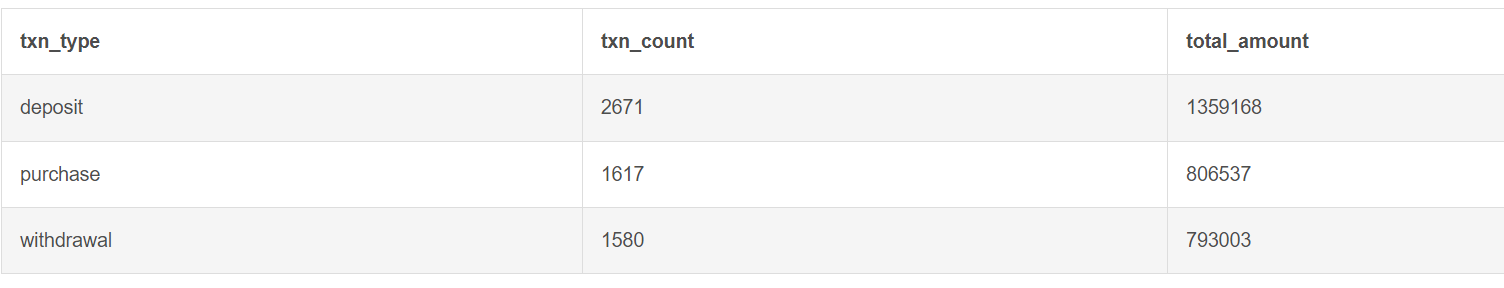


## 2. What is the average total historical deposit counts and amounts for all customers?

```sql
WITH deposits as (
SELECT customer_id,COUNT(txn_type) as txn_count,
SUM(txn_amount) as total_amount
FROM data_bank.customer_transactions
WHERE txn_type = 'deposit'
GROUP BY customer_id
)

SELECT AVG(txn_count) as avg_txn_cnt,
AVG(total_amount) as avg_txn_amount
FROM deposits
```

Output:

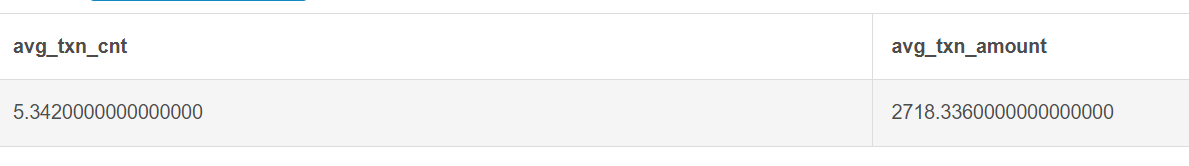

## 3. For each month - how many Data Bank customers make more than 1 deposit and either 1 purchase or 1 withdrawal in a single month?